# Importing libraries

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [167]:
from google.colab import files
files.upload()

In [168]:
df=pd.read_csv("/content/insurance.csv")

# Information of dataset

In [169]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprocessing

In [171]:
encode=LabelEncoder()

In [172]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [173]:
df["sex"]=encode.fit_transform(df["sex"])
df["smoker"]=encode.fit_transform(df["smoker"])
df["region"]=encode.fit_transform(df["region"])

In [174]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


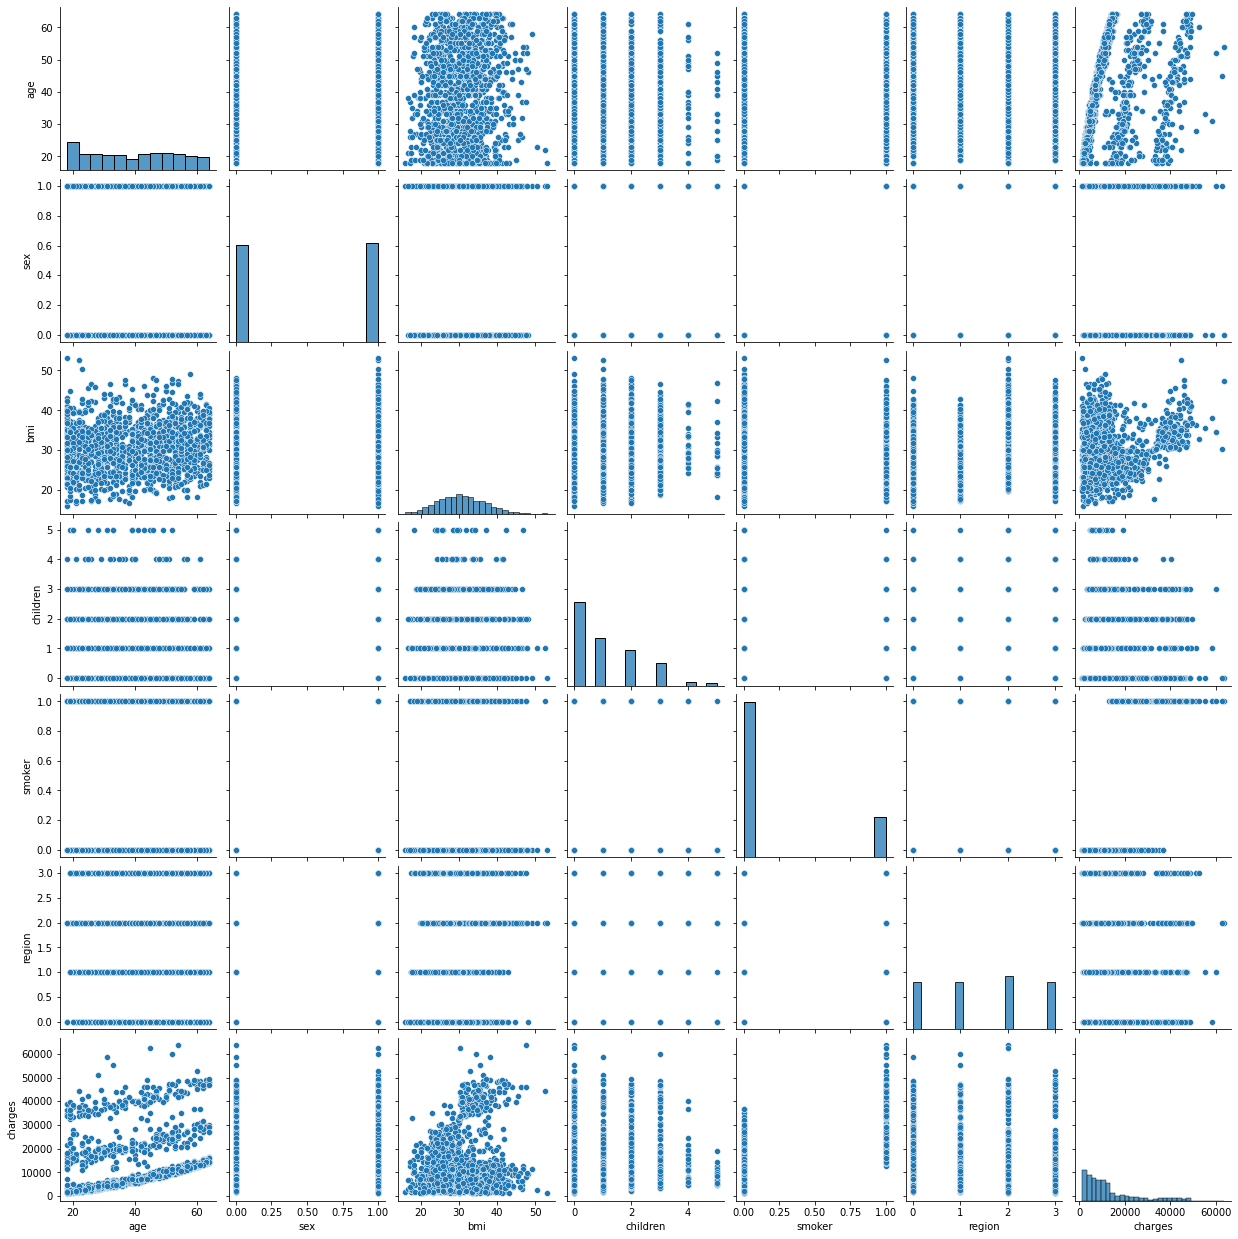

In [175]:
sns.pairplot(df)

**Detecting and removind noise**

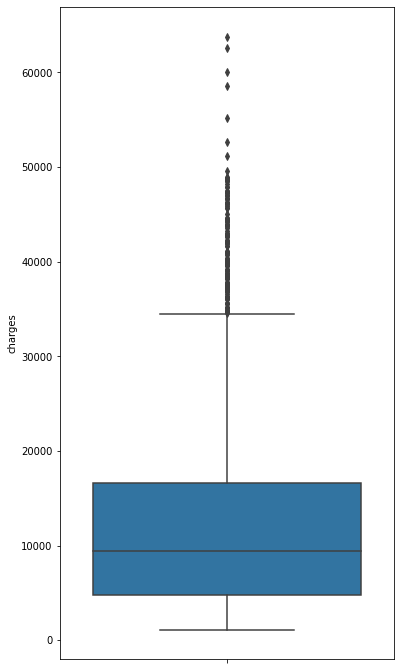

In [176]:
plt.figure(figsize=(6,12))
sns.boxplot(y=df["charges"])

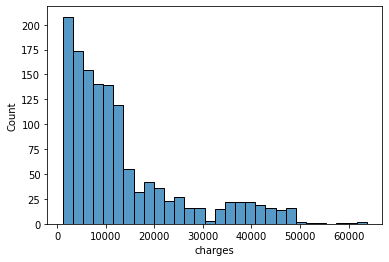

In [177]:
sns.histplot(df["charges"])

In [178]:
df=df[df["charges"]<50000]

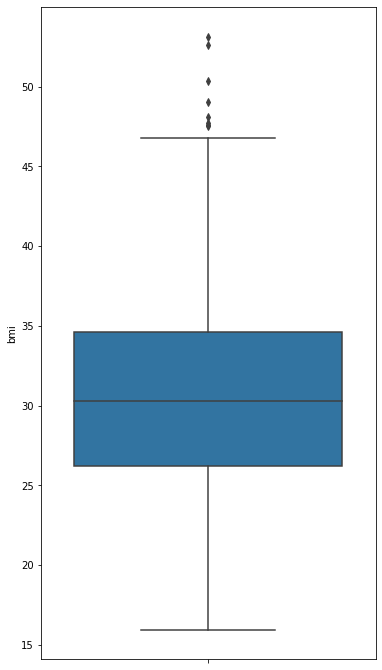

In [179]:
plt.figure(figsize=(6,12))
sns.boxplot(y=df["bmi"])

In [180]:
df=df[df["bmi"]<47]

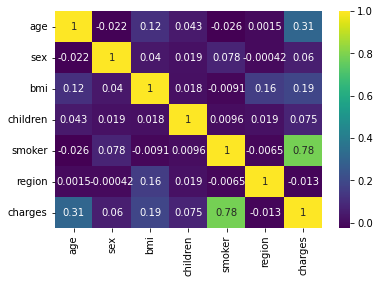

In [181]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In the charges column I saw a linear relation so I decided to seperate them

In [182]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3,)
labels=gm.fit_predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


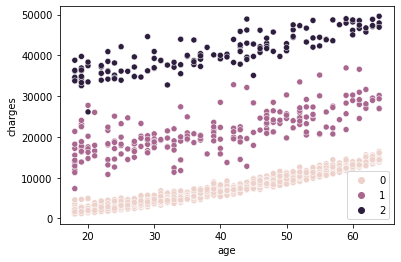

In [183]:
sns.scatterplot(df["age"],df["charges"],hue=labels)

In [184]:
df["labels"]=labels

In [185]:
group1=df[df["labels"]==1]
group2=df[df["labels"]==2]
group3=df[df["labels"]==0]

In [186]:
group1=group1.drop("labels",axis=1)
group2=group2.drop("labels",axis=1)
group3=group3.drop("labels",axis=1)

In [187]:
print(group1.shape)
print(group2.shape)
print(group3.shape)

(223, 7)
(141, 7)
(959, 7)


**Removing more noise**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


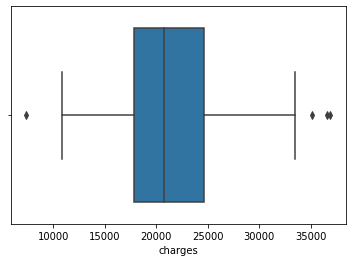

In [188]:
sns.boxplot(group1["charges"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


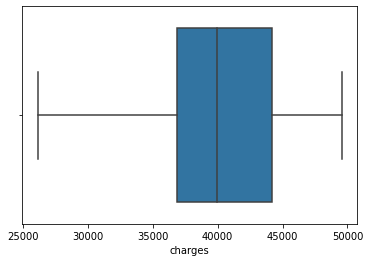

In [189]:
sns.boxplot(group2["charges"])

In [190]:
group2=group2[(group2["charges"]<34900) & (group2["charges"]>10000)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


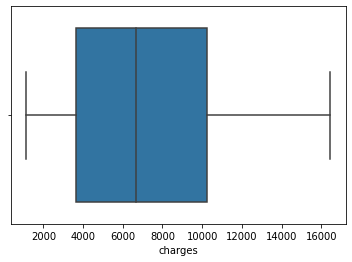

In [191]:
sns.boxplot(group3["charges"])

In [192]:
x=group1.drop("charges",axis=1)
y=group1["charges"]

xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y)

x=group2.drop("charges",axis=1)
y=group2["charges"]

xtrain2,xtest2,ytrain2,ytest2=train_test_split(x,y)

x=group3.drop("charges",axis=1)
y=group3["charges"]

xtrain3,xtest3,ytrain3,ytest3=train_test_split(x,y)

# Function of the models

In [193]:
def Model_Constructor(model ,xtrain ,ytrain ,xtest ,ytest ):
  result=model.fit(xtrain,ytrain).predict(xtest)
  print(str(model)+ " results:")
  return (mean_squared_error(result,ytest)**.5)

# LinearRegression

In [224]:
print("\nGroup1: \n")
lr_m1=Model_Constructor(LinearRegression() , xtrain1, ytrain1, xtest1, ytest1)
print(lr_m1)

print("\nGroup2: \n")
lr_m2=Model_Constructor(LinearRegression() , xtrain2, ytrain2, xtest2, ytest2)
print(lr_m2)

print("\nGroup3: \n")
lr_m3=Model_Constructor(LinearRegression() , xtrain3, ytrain3, xtest3, ytest3)
print(lr_m3)


Group1: 

LinearRegression() results:
3869.4024854834693

Group2: 

LinearRegression() results:
2685.4827702671837

Group3: 

LinearRegression() results:
534.5631784437014


In [255]:
lr_res=(lr_m1*len(xtest1)+lr_m2*len(xtest2)+lr_m3*len(xtest3))/(len(xtest1)+len(xtest2)+len(xtest3))
print(lr_res)

1190.7279596840483


# Search Function

In [208]:
def Tuner(params, model, x, y):
  Gride=GridSearchCV(model, params)
  Gride.fit(x,y)
  print(Gride.best_params_)

# KNeighborsRegressor

In [217]:
knn=KNeighborsRegressor()
params={"n_neighbors":[x for x in range(1,30)]}
Tuner(params, knn, pd.concat([xtrain1,xtest1],axis=0), pd.concat([ytrain1,ytest1],axis=0))

params={"n_neighbors":[x for x in range(1,16)]}
Tuner(params, knn, pd.concat([xtrain2,xtest2],axis=0), pd.concat([ytrain2,ytest2],axis=0))

params={"n_neighbors":[x for x in range(1,30)]}
Tuner(params, knn, pd.concat([xtrain3,xtest3],axis=0), pd.concat([ytrain3,ytest3],axis=0))

{'n_neighbors': 28}
{'n_neighbors': 4}
{'n_neighbors': 3}


In [225]:
print("\nGroup1: \n")
knn_m1=Model_Constructor(KNeighborsRegressor(n_neighbors=28) , xtrain1, ytrain1, xtest1, ytest1)
print(knn_m1)

print("\nGroup2: \n")
knn_m2=Model_Constructor(KNeighborsRegressor(n_neighbors=4) , xtrain2, ytrain2, xtest2, ytest2)
print(knn_m2)

print("\nGroup3: \n")
knn_m3=Model_Constructor(KNeighborsRegressor(n_neighbors=3) , xtrain3, ytrain3, xtest3, ytest3)
print(knn_m3)


Group1: 

KNeighborsRegressor(n_neighbors=28) results:
3997.324472163859

Group2: 

KNeighborsRegressor(n_neighbors=4) results:
342.3308113528482

Group3: 

KNeighborsRegressor(n_neighbors=3) results:
527.9197241782282


In [256]:
knn_res=(knn_m1*len(xtest1)+knn_m2*len(xtest2)+knn_m3*len(xtest3))/(len(xtest1)+len(xtest2)+len(xtest3))
print(knn_res)

1170.3075026601832


# DecisionTreeRegressor

In [229]:
dtcr=DecisionTreeRegressor()

params={"splitter":['best',"random"], "max_depth":[x for x in range(5,20)], 
        "min_samples_split":[x/10 for x in range(1,11)], "min_samples_leaf":[x/10 for x in range(1,6)]}

Tuner(params, dtcr, pd.concat([xtrain1,xtest1],axis=0), pd.concat([ytrain1,ytest1],axis=0))

Tuner(params, dtcr, pd.concat([xtrain2,xtest2],axis=0), pd.concat([ytrain2,ytest2],axis=0))

Tuner(params, dtcr, pd.concat([xtrain3,xtest3],axis=0), pd.concat([ytrain3,ytest3],axis=0))

{'max_depth': 13, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'splitter': 'random'}
{'max_depth': 11, 'min_samples_leaf': 0.5, 'min_samples_split': 0.8, 'splitter': 'random'}
{'max_depth': 5, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'best'}


In [230]:
print("\nGroup1: \n")
dtc_m1=Model_Constructor(DecisionTreeRegressor(splitter="random",max_depth=13,min_samples_split=.2,min_samples_leaf=.1) , xtrain1, ytrain1, xtest1, ytest1)
print(dtc_m1)

print("\nGroup2: \n")
dtc_m2=Model_Constructor(DecisionTreeRegressor(splitter="random",max_depth=11,min_samples_split=.8,min_samples_leaf=.5) , xtrain2, ytrain2, xtest2, ytest2)
print(dtc_m2)

print("\nGroup3: \n")
dtc_m3=Model_Constructor(DecisionTreeRegressor(splitter="best",max_depth=151,min_samples_split=.1,min_samples_leaf=.1) , xtrain3, ytrain3, xtest3, ytest3)
print(dtc_m3)


Group1: 

DecisionTreeRegressor(max_depth=13, min_samples_leaf=0.1, min_samples_split=0.2,
                      splitter='random') results:
4257.574459908995

Group2: 

DecisionTreeRegressor(max_depth=11, min_samples_leaf=0.5, min_samples_split=0.8,
                      splitter='random') results:
835.6268633205497

Group3: 

DecisionTreeRegressor(max_depth=151, min_samples_leaf=0.1,
                      min_samples_split=0.1) results:
880.8577126884852


In [257]:
dtc_res=(dtc_m1*len(xtest1)+dtc_m2*len(xtest2)+dtc_m3*len(xtest3))/(len(xtest1)+len(xtest2)+len(xtest3))
print(dtc_res)

1508.3327412516376


# RandomForestRegressor

In [246]:
rfcr=RandomForestRegressor()

params={"n_estimators":[x for x in range(100,600,100)], "min_samples_split":[.2,.5,.7],"min_samples_leaf":[x/10 for x in range(1,6)]}

Tuner(params, rfcr, pd.concat([xtrain1,xtest1],axis=0), pd.concat([ytrain1,ytest1],axis=0))

Tuner(params, rfcr, pd.concat([xtrain2,xtest2],axis=0), pd.concat([ytrain2,ytest2],axis=0))

Tuner(params, rfcr, pd.concat([xtrain3,xtest3],axis=0), pd.concat([ytrain3,ytest3],axis=0))

{'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 500}
{'min_samples_leaf': 0.3, 'min_samples_split': 0.2, 'n_estimators': 100}
{'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 300}


In [252]:
print("\nGroup1: \n")
rfc_m1=Model_Constructor(RandomForestRegressor() , xtrain1, ytrain1, xtest1, ytest1)
print(rfc_m1)

print("\nGroup2: \n")
rfc_m2=Model_Constructor(RandomForestRegressor(min_samples_leaf=.3,min_samples_split=.2,n_estimators=100) , xtrain2, ytrain2, xtest2, ytest2)
print(rfc_m2)

print("\nGroup3: \n")
rfc_m3=Model_Constructor(RandomForestRegressor() , xtrain3, ytrain3, xtest3, ytest3)
print(rfc_m3)


Group1: 

RandomForestRegressor() results:
3774.769543026032

Group2: 

RandomForestRegressor(min_samples_leaf=0.3, min_samples_split=0.2) results:
948.3181643426266

Group3: 

RandomForestRegressor() results:
296.170712120555


In [258]:
rfc_res=(rfc_m1*len(xtest1)+rfc_m2*len(xtest2)+rfc_m3*len(xtest3))/(len(xtest1)+len(xtest2)+len(xtest3))
print(rfc_res)

954.1849041199472


# Results overviwe

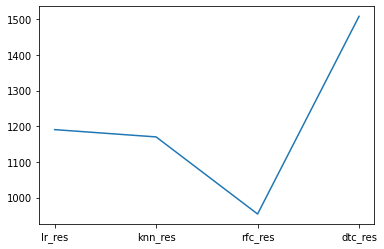

In [276]:
sns.lineplot(y=[lr_res,knn_res,rfc_res,dtc_res],x=["lr_res","knn_res","rfc_res","dtc_res"])

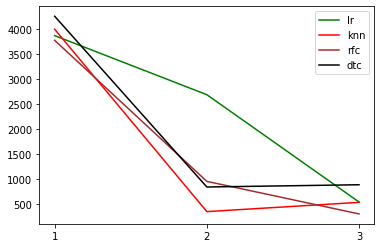

In [274]:
sns.lineplot(y=[lr_m1,lr_m2,lr_m3],x=["1","2","3"],color="green")
sns.lineplot(y=[knn_m1,knn_m2,knn_m3],x=["1","2","3"],color="red")
sns.lineplot(y=[rfc_m1,rfc_m2,rfc_m3],x=["1","2","3"],color="brown")
sns.lineplot(y=[dtc_m1,dtc_m2,dtc_m3],x=["1","2","3"],color="black")
plt.legend(["lr","knn","rfc","dtc"])